In [ ]:
#this dataset will be the first impression of the youtube videos which can help predict 
#how the video is going to do in its lifeciycle

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.stats as sts
from scipy.stats.stats import pearsonr
from sklearn.linear_model import LinearRegression
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [2]:
first_views= pd.read_csv('yt_data_usa_first_views.csv.txt')

In [3]:
first_views.head(5)

,Unnamed: 0,video_id,title,publishedAt,channelTitle,categoryId,trending_date,view_count,likes,dislikes,comment_count,Video_Category
0,20184,AWXvClaRtsI,Celebrating Maria Tallchief,2020-11-14T22:39:13Z,GoogleDoodles,10,2020-11-21T00:00:00Z,0,0,0,0,People & Blogs
1,65286,kmk5vciFbek,Demi Lovato performs their greatest hits this ...,2021-06-26T00:07:19Z,Demi Lovato,24,2021-06-28T00:00:00Z,0,0,0,132,Drama
2,49597,69KrkMpvZdg,Celebrating Luther Vandross's 70th Birthday,2021-04-19T15:00:08Z,GoogleDoodles,1,2021-04-21T00:00:00Z,0,0,0,0,Film & Animation
3,65504,ifJYb2An7wE,Gay And Not Proud - Daniel Howell | YouTube Pr...,2021-06-25T21:04:38Z,Daniel Howell,24,2021-06-29T00:00:00Z,0,0,0,1739,Drama
4,50927,hAxqygRdM4g,Earth Day 2021 Doodle,2021-04-21T11:00:14Z,GoogleDoodles,1,2021-04-27T00:00:00Z,0,0,0,0,Film & Animation


In [5]:
#adding a column in the youtbe dataset to count the numeber of words in the title and customer engagement
#counting spaces and adding 1 to it
#customer engagement can be seen as both positive and negative that is likes and dislikes
first_views['title_wordcount'] = first_views['title'].str.count(' ') + 1
first_views['engagement']= first_views['likes']+ first_views['dislikes']

<AxesSubplot:xlabel='engagement', ylabel='view_count'>

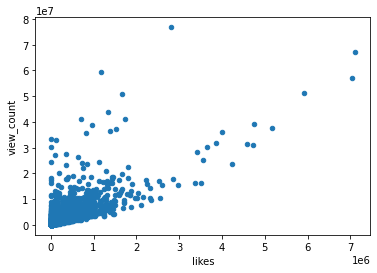

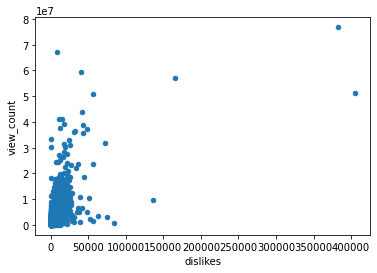

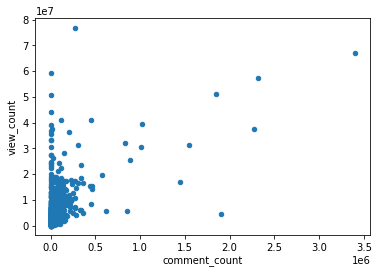

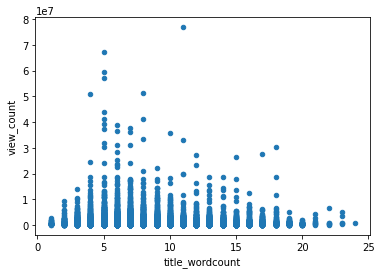

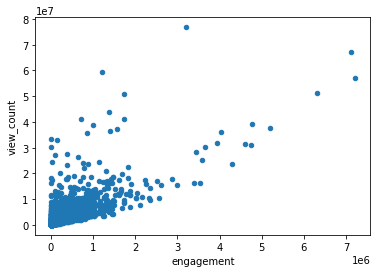

In [10]:
first_views.plot.scatter(x='likes', y='view_count')
first_views.plot.scatter(x='dislikes', y='view_count')
first_views.plot.scatter(x='comment_count', y='view_count')
first_views.plot.scatter(x='title_wordcount', y='view_count')
first_views.plot.scatter(x='engagement', y='view_count')
#As likes are increasing, view count is increasing as well

#for the first ipressions dislikes dont seem to be afffecting the view counts but this 
#can be validated in the regression analysis

#the increase in comments also seem to be affecting the views positively

#5-7 words seem to be the optimum word count for better views in the data

#engagement seems to have a positive influence on views of a video

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

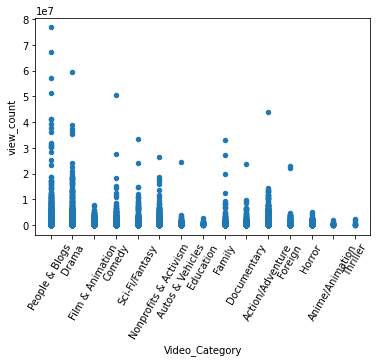

In [19]:
first_views.plot.scatter(x='Video_Category', y='view_count')
plt.xticks(rotation=60)
#people and blogs seem to be top performer

In [20]:
import statsmodels.formula.api as smf

In [21]:
#Finding which variables are essential in view count with the help of regression
mr1= smf.ols('view_count ~ title_wordcount + likes + dislikes+ comment_count+ Video_Category', first_views).fit()
print(mr1.summary())

                            OLS Regression Results                            
Dep. Variable:             view_count   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     1181.
Date:                Sun, 24 Apr 2022   Prob (F-statistic):               0.00
Time:                        18:55:11   Log-Likelihood:            -1.7595e+05
No. Observations:               11184   AIC:                         3.519e+05
Df Residuals:                   11165   BIC:                         3.521e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [ ]:
#In the video category, for the first impressions Comedy seems to do a good job
#Along with this, Documentaries, Foreign, Horror, Non Profits and Activism, People and blogs, Scifi and Fantasy
#The significant categories in the first impressions show that people viewing them have a genuine interest in them
#rather than these videos appraring as suggestions because of more likes or comment count
#and that is why they have viewed them

In [ ]:
#title wordcount seems to be unimportant for the first impressions
#likes, dislikes and comment_count seem to be important for the first impressions as well
#we can see a different pattern in the last impressions for both video categories and title_wordcount